In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
try:
    #plt.style.use('belle2')
    plt.style.use('belle2_serif'
                 )
    #plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   

px = 1/plt.rcParams['figure.dpi']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import os
import pandas as pd
from pandas import HDFStore
from os import path
from yaml import safe_load

from hist.get_data import get_data
from hist.bkg_stack import generic_ntuple, get_data_in_module
from read_yaml_to_dict import read_yaml_to_dict
from src.sample_name import sample_name
from src.combine_cuts import combine_cuts
print(os.getcwd())

/home/jykim/workspace/DRAW


In [39]:
from hist.stack_include_signal import draw_stack_include_signal

In [40]:
plot_variables = read_yaml_to_dict("plot_variables")
print(plot_variables)

{'vars': ['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal']}


In [41]:
location='lab_local'
#locatoin='kekcc'
#location='laptop'

In [42]:
sample_info = read_yaml_to_dict("samples")
print(sample_info)

{'pid_0_5': {'ccbar': '/ccbar/pid_0_5_ccbar_recon_output_0*.root', 'charged': '/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'}, 'pid_0_5_no_signal': {'ccbar': '/ccbar/pid_0_5_no_signal_ccbar_recon_output_0*.root', 'charged': '/charged/pid_0_5_charged_recon_output_0*.root', 'mixed': '/mixed/pid_0_5_mixed_recon_output_0*.root', 'uubar': '/uubar/pid_0_5_uubar_recon_output_0*.root', 'ddbar': '/ddbar/pid_0_5_ddbar_recon_output_0*.root', 'ssbar': '/ssbar/pid_0_5_ssbar_recon_output_0*.root', 'taupair': '/taupair/pid_0_5_taupair_recon_output_0*.root'}, 'location': {'kekcc': '/group/belle/users/jaeyoung/storage/01_recon/merge_generic_bkg', 'lab_nas': '/home/jykim/nas/storage/01_recon/merge_generic_bkg', 'lab_local': '/home/

In [43]:
option = 'pid_0_5'
option = 'pid_0_5_no_signal'

sample_loc=sample_name(option=option, location=location, sample_info=sample_info) 
#sample_loc=sample_name(option='pid_0_5_no_signal', location=location) 
#print(sample_loc )

In [31]:
List = ['phi', 'antiKstar', 'rho', 'omega']

In [32]:
for mode in List:
    if mode == 'phi':
        plot_variables = read_yaml_to_dict("plot_variables")
        pd_phi = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'antiKstar':
        plot_variables = read_yaml_to_dict("plot_variables")
        pd_antiKstar = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'rho':
        plot_variables = read_yaml_to_dict("plot_variables")
        pd_rho = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
    elif mode == 'omega':
        plot_variables = read_yaml_to_dict("plot_variables")
        pd_omega = generic_ntuple(vector=mode, variables_dict=plot_variables,sample_location=sample_loc)
        

['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'Phi_InvM', 'D0_cosHel_0']
['D0_M', 'Dstarp_Q', 'D0_cosHel_0', 'Dstarp_CMS_p', 'gamma_E', 'gamma_clusterSecondMoment', '__ncandidates__', '__experiment__', '__run__', '__event__', 'Dstarp_isSignal', 'D0_isSignal', 'antiKstar_InvM', 'D0_cosHel_0']


KeyboardInterrupt: 

In [ ]:
for mode in List:
    if mode == 'phi':
        pd_phi.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode == 'antiKstar':
        pd_antiKstar.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode == 'rho':
        pd_rho.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 
    elif mode =='omega':  
        pd_omega.to_hdf(option + "_" + mode + ".h5",key='jykim', mode='w') 



In [44]:
file = '/home/jykim/workspace/data/1ab_generic/pid_0_5_phi.h5'
df = pd.read_hdf(file, key='jykim')

In [45]:
list(df.columns)

['D0_M',
 'Dstarp_Q',
 'D0_cosHel_0',
 'Dstarp_CMS_p',
 'gamma_E',
 'gamma_clusterSecondMoment',
 '__ncandidates__',
 '__experiment__',
 '__run__',
 '__event__',
 'Dstarp_isSignal',
 'D0_isSignal',
 'Phi_InvM',
 'class']

In [46]:
file = '/home/jykim/workspace/data/1ab_generic/pid_0_5_no_signal_phi.h5'
df_no = pd.read_hdf(file, key='jykim')

TypeError: 'NoneType' object is not subscriptable

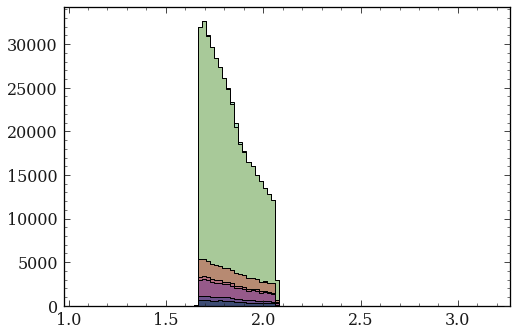

In [47]:
draw_stack_include_signal(df=df, df_no_signal=df_no,bins=100, vector='phi')

In [ ]:
variables = list(df.columns)
variables = ['D0_M']
ccbar_bkg = df_no[df_no['class']=='ccbar']
signal    = df[df['Dstarp_isSignal']==1]

charged_bkg = df[df['class']=='charged']
mixed_bkg = df[df['class']=='mixed']
uubar_bkg = df[df['class']=='uubar']
ddbar_bkg = df[df['class']=='ddbar']
ssbar_bkg = df[df['class']=='ssbar']
taupair_bkg = df[df['class']=='taupair']

#data_list = {}
labels = ['signal', 'ccbar', 'charged', 'mixed', 'uubar', 'ddbar', 'ssbar', 'taupair']
for var in variables:
    data_list  = [signal[var], ccbar_bkg[var], charged_bkg[var], mixed_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var] ] 
    colors=sns.cubehelix_palette(8, start=1.5, rot=1.5, dark=0.3, light=.8, reverse=True)

    plt.hist(data_list, bins=100, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')

In [48]:
phi_extraction = read_yaml_to_dict("cuts")

In [49]:
print(phi_extraction)

{'phi_extraction': ['gamma_E>0.55', 'abs(Phi_InvM - 1.0195)<0.011', 'Dstarp_CMS_p > 2.42', 'abs(Dstarp_Q - 0.00593)<0.0006'], 'rho_extraction': ['gamma_E>0.55', 'abs(rho_InvM - 0.77526)<0.150', 'Dstarp_CMS_p > 2.72', 'abs(Dstarp_Q - 0.00593)<0.0006'], 'antiKstar_extraction': ['gamma_E>0.55', 'abs(antiKstar_InvM - 0.89555)<0.22', 'Dstarp_CMS_p > 2.17', 'abs(Dstarp_Q - 0.00593)<0.0006'], 'omega_extraction': ['gamma_E>0.55', 'abs(Omega_InvM - 0.78265)<0.020', 'Dstarp_CMS_p > 2.7', 'abs(Dstarp_Q - 0.00593)<0.0006']}


In [50]:
new_Cuts = combine_cuts(phi_extraction, 'phi_extraction')

In [51]:
print(new_Cuts)

gamma_E>0.55 & abs(Phi_InvM - 1.0195)<0.011 & Dstarp_CMS_p > 2.42 & abs(Dstarp_Q - 0.00593)<0.0006


In [52]:
df_phi_extraction = df.query(new_Cuts)

In [53]:
df_no_phi_extraction = df_no.query(new_Cuts)

In [122]:
var_unit_phi = read_yaml_to_dict("vars_name_units")

var_unit_phi = var_unit_phi['units']

var_name_phi = read_yaml_to_dict("vars_name_units")
var_name_phi = var_name_phi['name']
print(var_name_phi)
#var_name_phi.replace("\\", " \ " )
                     



{'D0_M': 'M(D^0)', 'Dstarp_Q': 'Q', 'D0_cosHel_0': 'mathrm{cos}Hel_0', 'Dstarp_CMS_p': 'P_{D^{*+}_{CMS}}', 'gamma_E': 'E_{gamma}', 'gamma_clusterSecondMoment': 'clusterSecondmoment(gamma)', '__ncandidates__': 'ncandidiates', '__experiment__': 'experiment', '__run__': 'run', '__event__': 'event', 'Dstarp_isSignal': 'Dstarp isSignal', 'D0_isSignal': 'D0 isSignal', 'Phi_InvM': 'M(/phi)', 'Rho_InvM': 'M(/rho^0)', 'antiKstar_InvM': 'M(/bar{K}^{*0})', 'Omega_InvM': 'M(/omega)'}


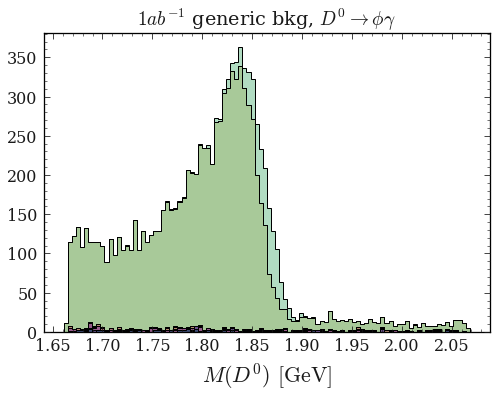

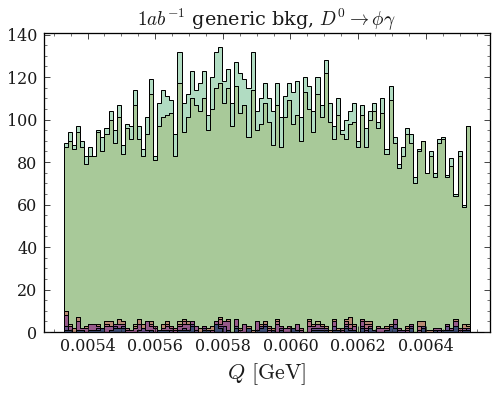

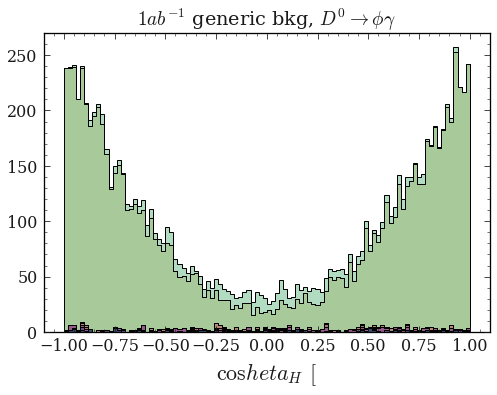

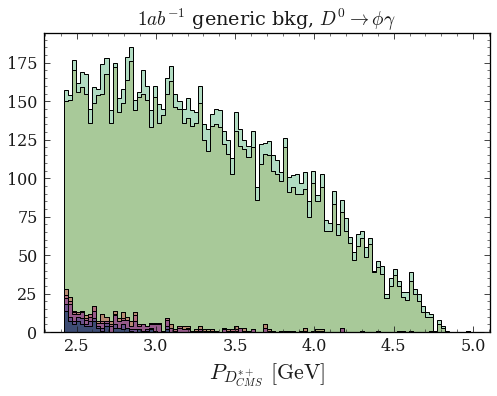

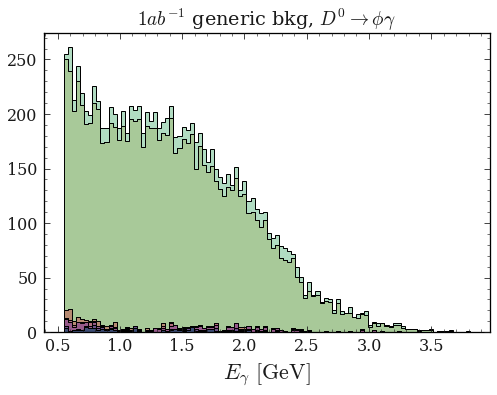

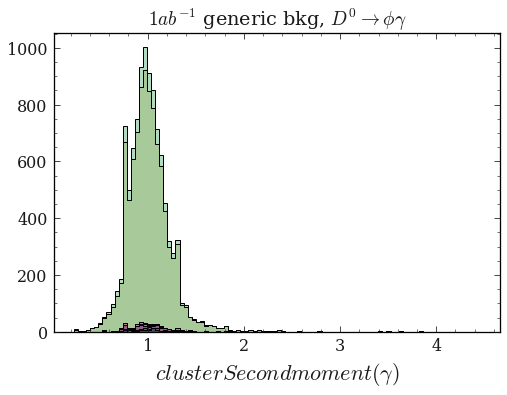

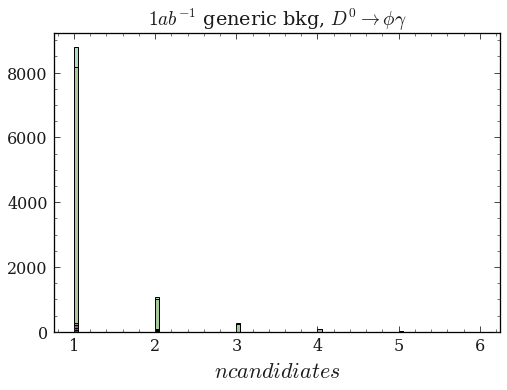

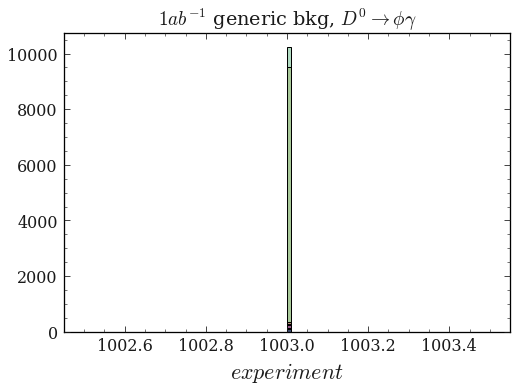

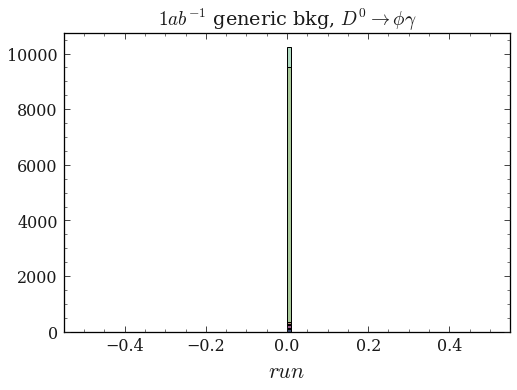

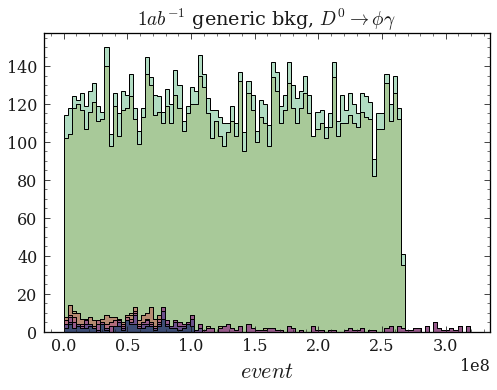

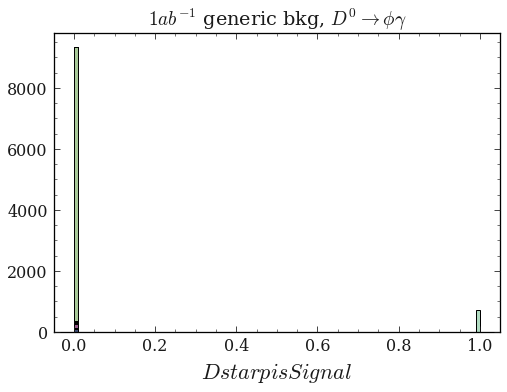

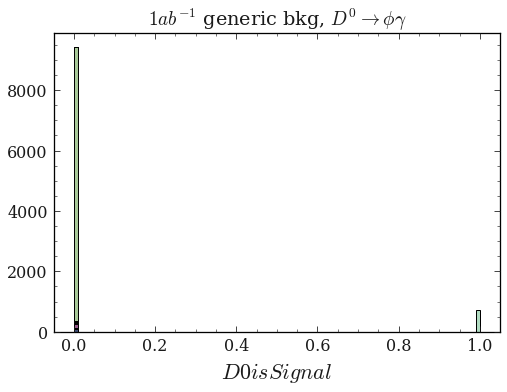

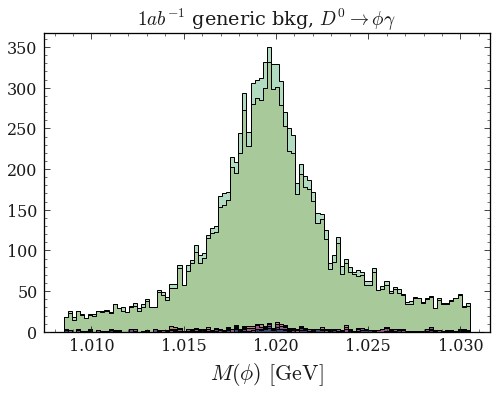

dict_keys(['phi', 'rho', 'antiKstar', 'omega'])


<Figure size 576x396 with 0 Axes>

In [123]:
draw_stack_include_signal(df=df_phi_extraction, df_no_signal=df_no_phi_extraction,bins=100, vector='phi', var_name=var_name_phi,var_unit=var_unit_phi, plot_title=r'$1ab^{-1}$ generic bkg, $D^0 \rightarrow \phi \gamma$')